In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle
import numpy as np
from hyperparameters import radius, n

In [43]:
n

5

In [44]:
df = pd.read_csv('out.csv')
df

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,Unnamed: 10
0,99.999999,0.000000e+00,30.901699,95.105651,-80.901699,58.778525,-80.901699,-58.778525,30.901699,-95.105651,NaN
1,99.999997,2.549353e-09,30.901699,95.105649,-80.901697,58.778524,-80.901697,-58.778524,30.901699,-95.105649,NaN
2,99.999995,6.669133e-09,30.901698,95.105647,-80.901695,58.778522,-80.901695,-58.778522,30.901698,-95.105647,NaN
3,99.999991,1.768709e-08,30.901697,95.105643,-80.901692,58.778520,-80.901692,-58.778520,30.901697,-95.105643,NaN
4,99.999987,3.423881e-08,30.901695,95.105639,-80.901689,58.778517,-80.901689,-58.778517,30.901695,-95.105639,NaN
...,...,...,...,...,...,...,...,...,...,...,...
122889,-95.004864,-2.039816e-01,-29.347302,-90.353472,76.975592,-55.684707,76.654811,56.131763,-29.684554,90.256640,NaN
122890,-95.004864,-2.039816e-01,-29.347302,-90.353472,76.975592,-55.684707,76.656539,56.132769,-29.684554,90.256640,NaN
122891,-95.004864,-2.039816e-01,-29.347302,-90.353472,76.975592,-55.684707,76.658270,56.133771,-29.684554,90.256640,NaN
122892,-95.004864,-2.039816e-01,-29.347302,-90.353472,76.975592,-55.684707,76.660001,56.134772,-29.684554,90.256640,NaN


In [45]:
vel = pd.read_csv('vel.csv')
vel

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,Unnamed: 10
0,-0.000894,-0.000000,-0.000276,-0.000851,0.000724,-0.000526,0.000724,0.000526,-0.000276,0.000851,NaN
1,-0.001789,0.000003,-0.000551,-0.001702,0.001448,-0.001050,0.001445,0.001054,-0.000553,0.001701,NaN
2,-0.002683,0.000004,-0.000830,-0.002552,0.002168,-0.001581,0.002167,0.001583,-0.000825,0.002553,NaN
3,-0.003578,0.000011,-0.001107,-0.003402,0.002897,-0.002099,0.002889,0.002110,-0.001096,0.003406,NaN
4,-0.004472,0.000017,-0.001379,-0.004254,0.003620,-0.002626,0.003617,0.002631,-0.001371,0.004257,NaN
...,...,...,...,...,...,...,...,...,...,...,...
122889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.725139,1.011877,0.000000,0.000000,NaN
122890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.728648,1.005870,0.000000,0.000000,NaN
122891,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.730810,1.002146,0.000000,0.000000,NaN
122892,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.731262,1.001364,0.000000,0.000000,NaN


In [46]:
acc = pd.read_csv('acc.csv')
acc

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,Unnamed: 10
0,-0.894427,-0.000000e+00,-0.276393,-0.850651,0.723607,-0.525731,0.723607,0.525731,-0.276393,0.850651,NaN
1,-0.894427,-0.000000e+00,-0.276393,-0.850651,0.723607,-0.525731,0.723607,0.525731,-0.276393,0.850651,NaN
2,-0.894427,-1.140105e-11,-0.276393,-0.850651,0.723607,-0.525731,0.723607,0.525731,-0.276393,0.850651,NaN
3,-0.894427,-2.982527e-11,-0.276393,-0.850651,0.723607,-0.525731,0.723607,0.525731,-0.276393,0.850651,NaN
4,-0.894427,-7.909906e-11,-0.276393,-0.850651,0.723607,-0.525731,0.723607,0.525731,-0.276393,0.850651,NaN
...,...,...,...,...,...,...,...,...,...,...,...
122889,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.759911,0.473584,0.000000,0.000000,NaN
122890,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.759664,0.473440,0.000000,0.000000,NaN
122891,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.759415,0.473298,0.000000,0.000000,NaN
122892,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.759166,0.473157,0.000000,0.000000,NaN


In [47]:
priority = open('priority.csv', 'r')
priority = priority.readline()
priority = priority.split(", ")
priority = np.array([float(x) for x in priority],dtype=np.float16)
priority

array([4.79 , 3.436, 3.096, 1.137, 2.723], dtype=float16)

In [48]:
radius

100

In [49]:
n

5

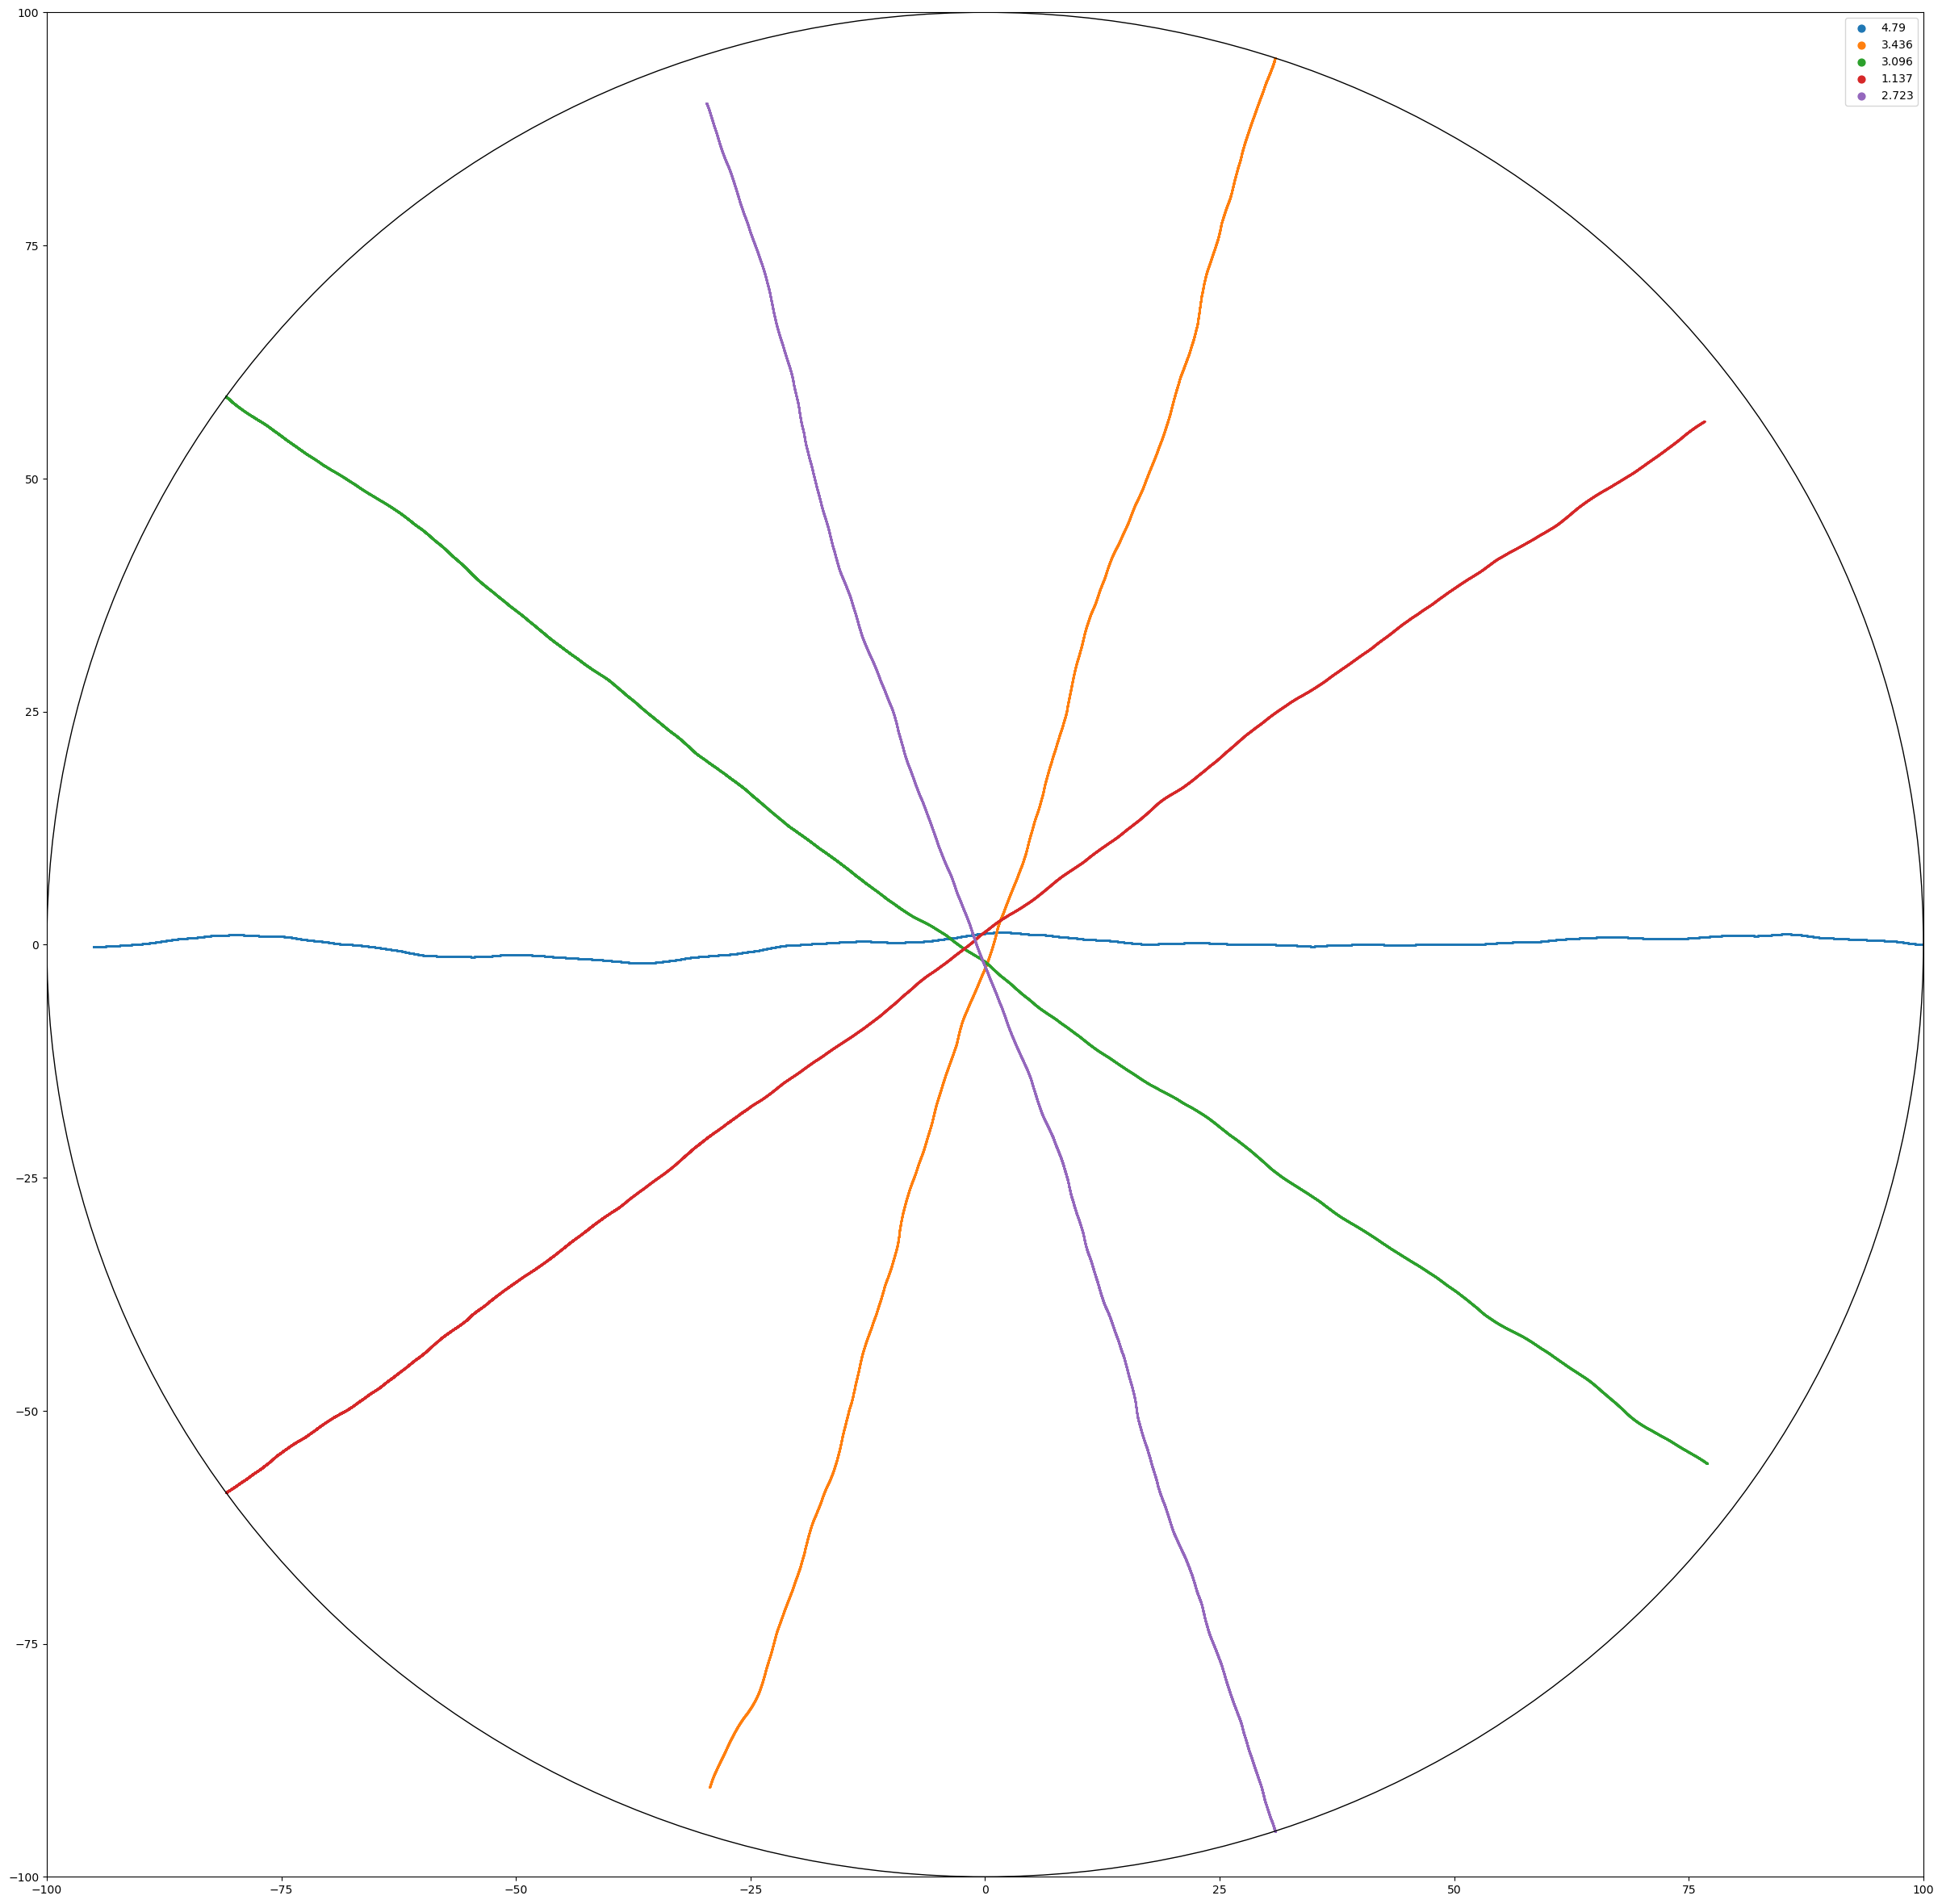

In [50]:
fig,axes = plt.subplots(figsize=(30,30))
axes.set_xlim([-radius,radius])
axes.set_ylim([-radius,radius])
for i in range(n):
    c = priority[i]
    plt.scatter(df[str(i)+'x'],df[str(i)+'y'],s=0.1)
plt.legend(priority, markerscale=20)
axes.add_patch(plt.Circle((0,0), radius, fill=False))
plt.show()

In [51]:
avg_dist = pd.read_csv('avg.csv', header=None)
time = pd.read_csv('time.csv', header=None)

<BarContainer object of 5 artists>

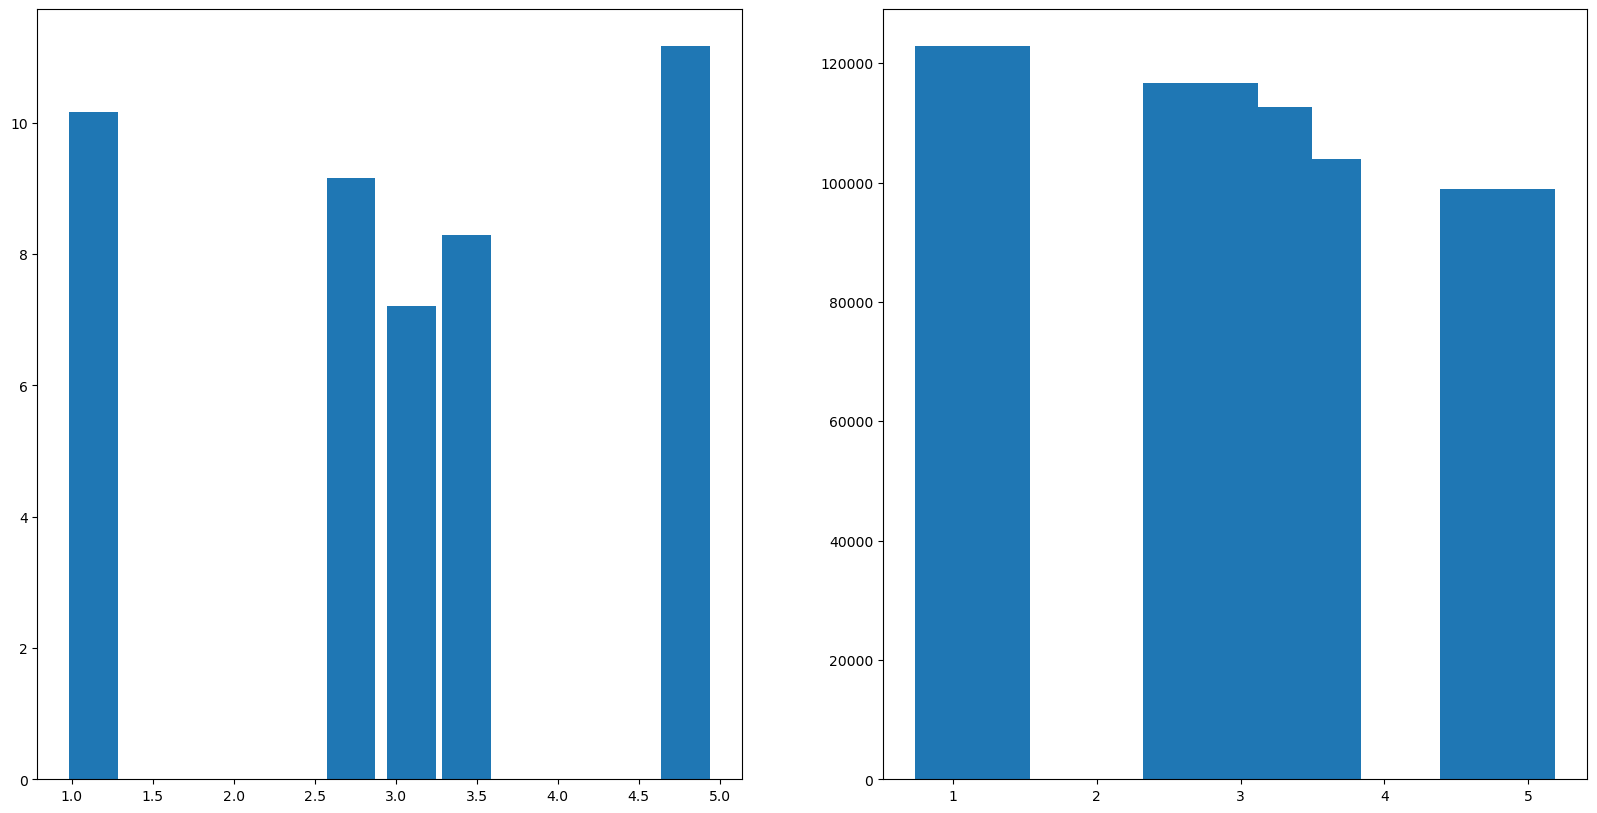

In [52]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

ax1.bar( priority, avg_dist.iloc[0],width=0.3)
ax2.bar(priority, time.iloc[0])

In [53]:
dist = np.histogram(priority, 5)
dist[1]

array([1.137, 1.867, 2.598, 3.328, 4.06 , 4.79 ], dtype=float16)

In [54]:
priority = np.array(priority)

In [55]:
color = np.digitize(priority, dist[1])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


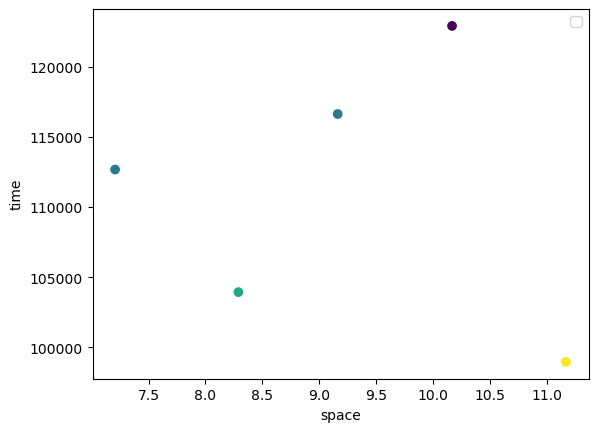

In [56]:
plt.scatter(avg_dist.iloc[0], time.iloc[0], c=color)
plt.xlabel('space')
plt.ylabel('time')
plt.legend()

In [57]:
def data(k):
    global df, vel
    out = []
    vel_ = []
    acc_ = []
    for i in range(n):
        out.append((df[str(i)+'x'].iloc[:k],df[str(i)+'y'].iloc[:k]))
        vel_.append((vel[str(i)+'x'].iloc[:k],vel[str(i)+'y'].iloc[:k]))
        acc_.append((acc[str(i)+'x'].iloc[:k],acc[str(i)+'y'].iloc[:k]))
    out = np.array(out)
    vel_ = np.array(vel_)
    acc_ = np.array(acc_)
    return out, vel_, acc_

In [58]:
pos, v, a = data(500)
pos.shape

(5, 2, 500)

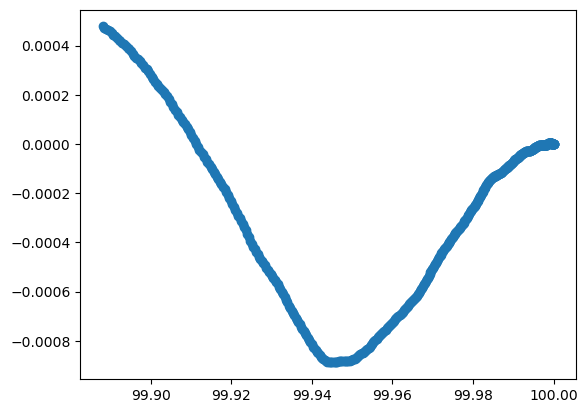

In [59]:
plt.scatter(pos[0][0], pos[0][1])

In [60]:
import os
from time import time

time_ = time()
print(time_)
folder = f'/media/agam/storage/plots/{time_}'
print("folder created", folder)
os.mkdir(folder)

1681923200.3980412
folder created /media/agam/storage/plots/1681923200.3980412


In [61]:
def vis(k):
    pos, v, a = data(k)
    fig = plt.subplots(figsize=(11,11))
    for i in range(n):
        plt.scatter(pos[i][0], pos[i][1], s=0.1)
        plt.arrow(pos[i][0][-1], pos[i][1][-1], v[i][0][-1], v[i][1][-1], color='black')
        plt.arrow(pos[i][0][-1], pos[i][1][-1], a[i][0][-1], a[i][1][-1], color='pink')
    #plt.legend(priority, markerscale=20)
    plt.title(str(k))
    plt.savefig(folder+'/'+str(k)+'.png')
    plt.close()
    #plt.show()
#vis(6000)

In [62]:
#vis(100)

In [63]:
from tqdm import tnrange, tqdm_notebook
from time import sleep

In [64]:
# for i in tnrange(100):
#     sleep(0.1)

In [65]:


for k in tnrange(1,len(df)//100):
    vis(k*100)




/tmp/ipykernel_115376/54962450.py:1: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for k in tnrange(1,len(df)//100):


  0%|          | 0/1227 [00:00<?, ?it/s]

In [ ]:
import imageio

In [ ]:
with imageio.get_writer(folder+'/line.gif', mode='i') as writer:
    for i in tnrange(1, len(df)//100):
        image = imageio.imread(folder+'/'+str(i*100)+'.png')
        writer.append_data(image)

/tmp/ipykernel_115376/3543387979.py:2: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(1, len(df)//100):


  0%|          | 0/111 [00:00<?, ?it/s]

/tmp/ipykernel_115376/3543387979.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(folder+'/'+str(i*100)+'.png')
